In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from Levenshtein import Levenshtein as lev

In [2]:
data = pd.read_csv('WikiWords_FirstMillion_Refined_V6.csv')

In [4]:
result = pd.DataFrame(columns=['i', 'j', 'text 1', 'text 2', 'distance', 'ratio'])
# answers = ["y=3a+b", "y = 3a+b", "y=3a + b", "y = 3a + b", "y = 3 a + b", "y = b + 3a", "y = b+3a", "y = 5a + 6b", "y = 12a + 6b"]

for i, ith_item in enumerate(data.name[0:100]):
    for j, jth_item in enumerate(data.name[i+1:100]):
        l = lev(ith_item, jth_item)
        res = l.run()
        result = result.append({'i': i, 'j': i+j+1, 'text 1': ith_item, 'text 2': jth_item, 'distance': res["distance"], 'ratio': res["ratio"]}, ignore_index=True)
        

In [5]:
df = result[(result.ratio >= 0.5) & (result.distance <= 5)]
print(df)

       i   j   text 1   text 2 distance     ratio
1      0   2      amp        a        2  0.500000
17     0  18      amp     came        3  0.571429
114    1  17       is       it        2  0.500000
134    1  37       is       ii        2  0.500000
148    1  51       is   copies        4  0.500000
160    1  63       is   listed        4  0.500000
165    1  68       is   images        4  0.500000
172    1  75       is     this        2  0.666667
174    1  77       is        i        1  0.666667
187    1  90       is       as        2  0.500000
189    1  92       is      its        1  0.800000
190    1  93       is       in        2  0.500000
199    2   5        a      may        2  0.500000
208    2  14        a      and        2  0.500000
216    2  22        a      was        2  0.500000
224    2  30        a      ayu        2  0.500000
233    2  39        a       at        1  0.666667
284    2  90        a       as        1  0.666667
509    5  30      may      ayu        2  0.666667


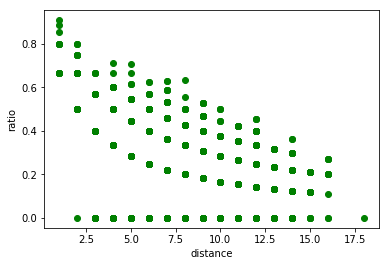

In [6]:
plt.plot(result['distance'].values, result['ratio'].values, 'go')
plt.xlabel('distance')
plt.ylabel('ratio')
plt.show()

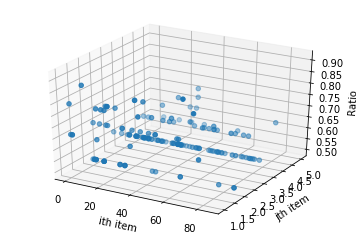

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['i'].values, df['distance'].values, df['ratio'].values)
# ax.set_xlim(0, 100)
# ax.set_ylim(0, 100)
# ax.set_zlim(0, 1)
ax.set_xlabel('ith item')
ax.set_ylabel('jth item')
ax.set_zlabel('Ratio')
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=3, random_state=0).fit(arr)